# **Preprocessing**

Number of images in Demented directory: 3018
Number of images in NonDemented directory: 3200


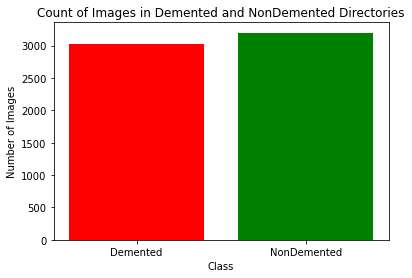

In [1]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    image_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_count += 1
    return image_count

# Example usage:
data_dir =r"/home/lab5/Downloads/combined"
demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')

num_demented_images = count_images_in_directory(demented_dir)
num_non_demented_images = count_images_in_directory(non_demented_dir)

# Print counts
print("Number of images in Demented directory:", num_demented_images)
print("Number of images in NonDemented directory:", num_non_demented_images)

# Plotting
labels = ['Demented', 'NonDemented']
counts = [num_demented_images, num_non_demented_images]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Count of Images in Demented and NonDemented Directories')
plt.show()


In [2]:
import os
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    
    # Rescale the image (optional)
    resized_image = resized_image.astype('float32') / 255.0
    
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

def preprocess_directory(directory, target_size):
    preprocessed_images = []
    labels = []
    label = 0 if directory.endswith('NonDemented') else 1  # Assign label based on directory name
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Ensure only image files are processed
            image_path = os.path.join(directory, filename)
            preprocessed_image = preprocess_image(image_path, target_size)
            preprocessed_images.append(preprocessed_image)
            labels.append(label)
    return preprocessed_images, labels

# Example usage:
target_size = (224,224)  # Specify your desired target size

demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')


preprocessed_demented_images, demented_labels = preprocess_directory(demented_dir, target_size)
preprocessed_non_demented_images, non_demented_labels = preprocess_directory(non_demented_dir, target_size)

# Combine the data from both directories
images = preprocessed_demented_images + preprocessed_non_demented_images
labels = demented_labels + non_demented_labels

# Now, all_images contains preprocessed image data and all_labels contains corresponding labels.
images = np.array(images)
labels = np.array(labels)



# Equal amount of data is taken

In [3]:
from sklearn.model_selection import train_test_split
# # Separate data for Normal and Tuberculosis classes
# nonDemented_images = images[labels == 0][:3000]
# Demented_images = images[labels == 1][:3000]
# nonDemented_labels = labels[labels == 0][:3000]
# Demented_labels = labels[labels == 1][:3000]

# Concatenate the data back together
# images = np.concatenate([nonDemented_images, Demented_images])
# labels = np.concatenate([nonDemented_labels, Demented_labels])
# # # Split the balanced dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



#print the balanced data
print("Balanced Images:",images.shape)
print("Balanced labels:",labels.shape)

# #print the data seperately of each class
# print("nonDemented_images:",nonDemented_images.shape)
# print("Demented_images:",Demented_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_valid shape:", y_valid.shape)

Balanced Images: (6218, 224, 224)
Balanced labels: (6218,)
X_train shape: (4476, 224, 224)
X_valid shape: (498, 224, 224)
X_test shape: (1244, 224, 224)
y_train shape: (4476,)
y_test shape: (1244,)
y_valid shape: (498,)


2024-03-25 15:05:11.914159: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 15:05:11.914922: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 15:05:11.955312: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 15:05:12.110848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 15:05:12.584416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

/tmp/ipykernel_6559/213127279.py:29: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 75, 75, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 75, 75, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 75, 75, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 75, 75, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 76, 76, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 37, 37, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 37, 37, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 37, 37, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 37, 37, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 300ms/step - accuracy: 0.7095 - loss: 0.7662 - val_accuracy: 0.8052 - val_loss: 0.4473
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - accuracy: 0.8866 - loss: 0.2561 - val_accuracy: 0.6446 - val_loss: 1.2038
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9444 - loss: 0.1476 - val_accuracy: 0.8876 - val_loss: 0.3040
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - accuracy: 0.9636 - loss: 0.0989 - val_accuracy: 0.7831 - val_loss: 0.8529
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9651 - loss: 0.0998 - val_accuracy: 0.8795 - val_loss: 0.2868
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9727 - loss: 0.0731 - val_accuracy: 0.9137 - val_loss: 0.3069
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9790 - loss: 0.0553 - val_accuracy: 0.8755 - val_loss: 0.3639
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9917 - loss: 0

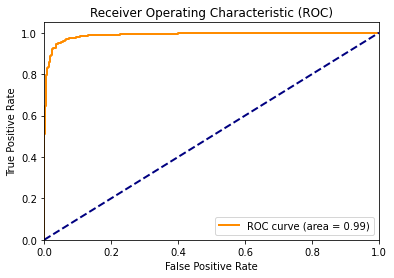

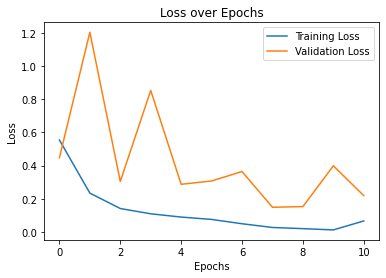

Accuracy: 0.952572347266881
Precision: 0.9453978159126365
Recall: 0.9619047619047619
F1 Score: 0.9535798583792289
Confusion Matrix:
[[579  35]
 [ 24 606]]
Cohen's Kappa: 0.9051074128854091
Matthews Correlation Coefficient: 0.9052490959732412
Balanced Accuracy: 0.9524507522878858
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9461 - loss: 0.2178
Test Accuracy: 95.26%
Test Loss: 18.41%
Execution time: 487.4940974712372
Metrics saved to metrics.csv file.


In [4]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping



# Assuming X_train, y_train, X_valid, y_valid, X_test, y_test are defined properly

start_time = time.time()
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

# Resize validation and test data
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load MobileNet model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with the classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (optional)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

predicted_probabilities = model.predict(X_test_resized)

predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
metrics = {
    'Combination':'1',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Execution Time (s)': execution_time
}
metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics saved to metrics.csv file.")


/tmp/ipykernel_6559/1623132412.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6184 - loss: 0.8226 - val_accuracy: 0.6908 - val_loss: 0.5746
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7563 - loss: 0.5087 - val_accuracy: 0.7530 - val_loss: 0.5026
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7842 - loss: 0.4588 - val_accuracy: 0.7570 - val_loss: 0.4780
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7944 - loss: 0.4298 - val_accuracy: 0.7691 - val_loss: 0.4584
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8142 - loss: 0.4059 - val_accuracy: 0.8133 - val_loss: 0.4144
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8460 - loss: 0.3575 - val_accuracy: 0.8153 - val_loss: 0.3834
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8508 - loss: 0.3422 - val_accuracy: 0.8173 - val_loss: 0.3921
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8587 - loss: 0.3176 - val_accu

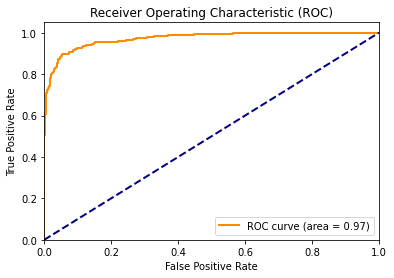

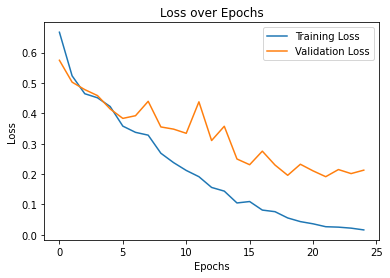

Accuracy: 0.9131832797427653
Precision: 0.9250814332247557
Recall: 0.9015873015873016
F1 Score: 0.9131832797427653
Confusion Matrix:
[[568  46]
 [ 62 568]]
Cohen's Kappa: 0.82639527791848
Matthews Correlation Coefficient: 0.8266687348120573
Balanced Accuracy: 0.9133343674060286
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9088 - loss: 0.2447
Test Accuracy: 91.32%
Test Loss: 22.28%
Execution time: 212.26114702224731
Metrics appended to metrics.csv file.


In [5]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train, y_train, X_valid, y_valid, X_test, y_test are defined properly

start_time = time.time()
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

# Resize validation and test data
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

batch_size = 32

history = model.fit(X_train_resized, y_train, batch_size=batch_size, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

predicted_probabilities = model.predict(X_test_resized)

predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
existing_metrics_df = pd.read_csv('MobileNet_Final_epoch_50_metrics.csv')

# Save metrics to DataFrame
metrics = {
    'Combination':'2',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
# Save metrics to DataFrame with an index
new_metrics_df = pd.DataFrame([metrics])

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


/tmp/ipykernel_6559/1067775962.py:27: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_2[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, None,      │          0 │ conv1_bn[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, None,      │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, None,      │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, None,      │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, None,      │      2,048 │ conv_dw_1_relu[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, None,      │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, None,      │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, None,      │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, None,      │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, None,      │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, None,      │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, None,      │      8,192 │ conv_dw_2_relu[0… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, None,      │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, None,      │          0 │ conv_pw_2_bn[0][

 Total params: 3,230,913 (12.32 MB)

 Trainable params: 3,209,025 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 309ms/step - accuracy: 0.6970 - loss: 1.1208 - val_accuracy: 0.8253 - val_loss: 0.4246
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 309ms/step - accuracy: 0.8920 - loss: 0.2555 - val_accuracy: 0.8012 - val_loss: 0.6471
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9118 - loss: 0.2933 - val_accuracy: 0.8876 - val_loss: 0.3491
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9613 - loss: 0.1248 - val_accuracy: 0.7289 - val_loss: 1.6788
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.9563 - loss: 0.1296 - val_accuracy: 0.8876 - val_loss: 0.4007
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 313ms/step - accuracy: 0.9630 - loss: 0.1058 - val_accuracy: 0.8655 - val_loss: 0.6257
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


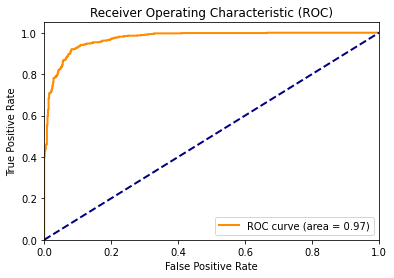

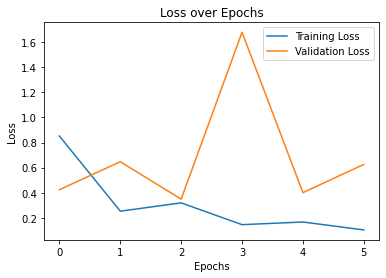

Accuracy: 0.8818327974276527
Precision: 0.8232931726907631
Recall: 0.9761904761904762
F1 Score: 0.8932461873638343
Confusion Matrix:
[[482 132]
 [ 15 615]]
Cohen's Kappa: 0.7630531455048667
Matthews Correlation Coefficient: 0.7769956780319778
Balanced Accuracy: 0.8806033814177137
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8899 - loss: 0.3515
Test Accuracy: 88.18%
Test Loss: 37.07%
Execution time: 269.60769844055176
Metrics appended to metrics.csv file.


In [6]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, Dense

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNet without top layer
base_model = MobileNet(weights='imagenet', include_top=False)
avg_pooling = GlobalAveragePooling2D()(base_model.output)
max_pooling = GlobalMaxPooling2D()(base_model.output)
x = Concatenate()([avg_pooling, max_pooling])
output = Dense(1, activation='sigmoid')(x)
model= Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
existing_metrics_df = pd.read_csv('MobileNet_Final_epoch_50_metrics.csv')

# Save metrics to DataFrame
metrics = {
    'Combination':'3',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
# Save metrics to DataFrame with an index
new_metrics_df = pd.DataFrame([metrics])

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


/tmp/ipykernel_6559/1716902357.py:27: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 75, 75, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 75, 75, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 75, 75, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 75, 75, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 76, 76, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 37, 37, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 37, 37, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 37, 37, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 37, 37, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,754,177 (14.32 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.6074 - loss: 1.1125 - val_accuracy: 0.7129 - val_loss: 0.5679
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6616 - loss: 0.6180 - val_accuracy: 0.7249 - val_loss: 0.5519
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7007 - loss: 0.5827 - val_accuracy: 0.6968 - val_loss: 0.5583
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.6959 - loss: 0.5746 - val_accuracy: 0.7289 - val_loss: 0.5381
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7073 - loss: 0.5573 - val_accuracy: 0.7329 - val_loss: 0.5287
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7049 - loss: 0.5405 - val_accuracy: 0.6426 - val_loss: 0.6071
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6906 - loss: 0.5670 - val_accuracy: 0.7470 - val_loss: 0.5307
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7402 - loss: 0.5209 - val_accu

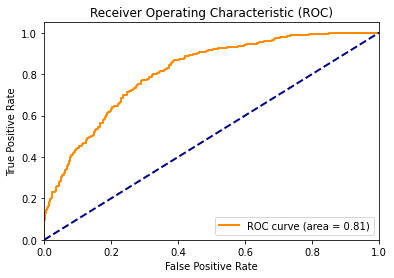

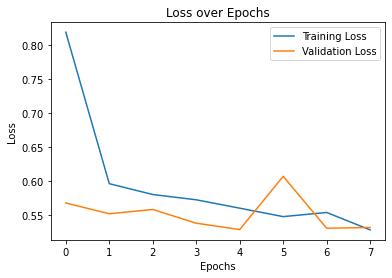

Accuracy: 0.7339228295819936
Precision: 0.7157287157287158
Recall: 0.7873015873015873
F1 Score: 0.7498110355253214
Confusion Matrix:
[[417 197]
 [134 496]]
Cohen's Kappa: 0.4670632332080473
Matthews Correlation Coefficient: 0.4694847608947039
Balanced Accuracy: 0.733227340882064
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7148 - loss: 0.5452
Test Accuracy: 73.39%
Test Loss: 53.66%
Execution time: 73.24956512451172
Metrics appended to metrics.csv file.


In [7]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Start time

start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
existing_metrics_df = pd.read_csv('MobileNet_Final_epoch_50_metrics.csv')

# Save metrics to DataFrame
metrics = {
    'Combination':'4',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
# Save metrics to DataFrame with an index
new_metrics_df = pd.DataFrame([metrics])

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)
# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


/tmp/ipykernel_6559/1415373314.py:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,885,249 (14.82 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.5885 - loss: 0.8443 - val_accuracy: 0.6727 - val_loss: 0.5940
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.6875 - loss: 0.5869 - val_accuracy: 0.7169 - val_loss: 0.5584
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7060 - loss: 0.5708 - val_accuracy: 0.7129 - val_loss: 0.5297
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7096 - loss: 0.5519 - val_accuracy: 0.7169 - val_loss: 0.5401
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7262 - loss: 0.5181 - val_accuracy: 0.7189 - val_loss: 0.5407
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7266 - loss: 0.5257 - val_accuracy: 0.7410 - val_loss: 0.5074
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7286 - loss: 0.5290 - val_accuracy: 0.7510 - val_loss: 0.4827
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7473 - loss: 0.5006 - val_accu

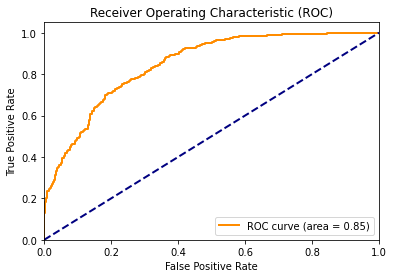

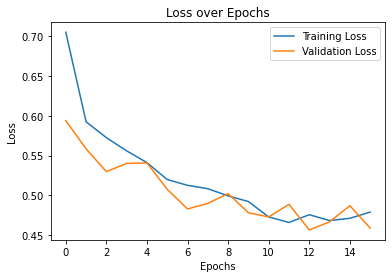

Accuracy: 0.7564308681672026
Precision: 0.755868544600939
Recall: 0.7666666666666667
F1 Score: 0.7612293144208039
Confusion Matrix:
[[458 156]
 [147 483]]
Cohen's Kappa: 0.5126904340811071
Matthews Correlation Coefficient: 0.51274415001158
Balanced Accuracy: 0.7562975027144409
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7306 - loss: 0.5039
Test Accuracy: 75.64%
Test Loss: 48.12%
Execution time: 140.89538025856018
Metrics appended to metrics.csv file.


In [8]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten


# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Load pre-trained MobileNet without top layer
base_model = MobileNet(weights='imagenet', include_top=False)
# Add custom classifier layers for fine-tuning with regularization and Conv2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout regularization

# Reshape the output tensor to match the expected input shape for Conv2D
x = Reshape((1, 1, 512))(x)  # Assuming the output shape of the previous layer is (None, 512)

# Add the Conv2D layer after reshaping
x = Conv2D(256, (1, 1), activation='relu')(x)  # Additional Conv2D layer with appropriate kernel size

# Flatten the output for further processing
x = Flatten()(x)  # Import the Flatten layer

# Continue with the rest of the model
output = Dense(1, activation='sigmoid')(x)



model = Model(inputs=base_model.input, outputs=output)

# Freeze some base MobileNet layers for feature extraction
for layer in base_model.layers[:100]:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
existing_metrics_df = pd.read_csv('MobileNet_Final_epoch_50_metrics.csv')

# Save metrics to DataFrame
metrics = {
    'Combination':'5',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
new_metrics_df = pd.DataFrame([metrics])

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")


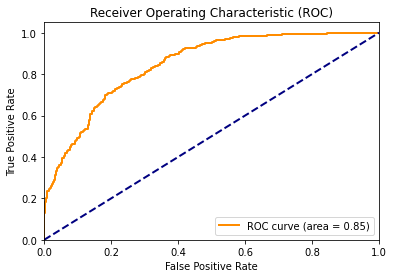

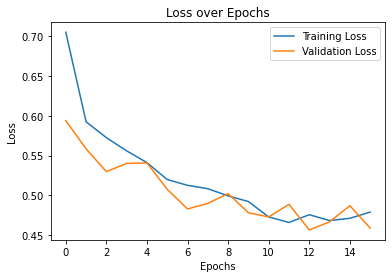

Accuracy: 0.7564308681672026
Precision: 0.755868544600939
Recall: 0.7666666666666667
F1 Score: 0.7612293144208039
Confusion Matrix:
[[458 156]
 [147 483]]
Cohen's Kappa: 0.5126904340811071
Matthews Correlation Coefficient: 0.51274415001158
Balanced Accuracy: 0.7562975027144409
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7306 - loss: 0.5039
Test Accuracy: 75.64%
Test Loss: 48.12%
Execution time: 143.16949653625488
Metrics appended to metrics.csv file.


In [9]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
existing_metrics_df = pd.read_csv('MobileNet_Final_epoch_50_metrics.csv')

# Save metrics to DataFrame
metrics = {
    'Combination':'5',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
new_metrics_df = pd.DataFrame([metrics])

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('MobileNet_Final_epoch_50_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")
